In [1]:
import pandas as pd
import datetime
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit

In [2]:
file_url="covid_19_data.csv"

df=pd.read_csv(file_url)

In [3]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4714,4715,03/10/2020,New Mexico,US,2020-03-10T02:33:04,0.0,0.0,0.0
4715,4716,03/10/2020,North Dakota,US,2020-03-10T02:33:04,0.0,0.0,0.0
4716,4717,03/10/2020,South Dakota,US,2020-03-10T02:33:04,0.0,0.0,0.0
4717,4718,03/10/2020,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0
4718,4719,03/10/2020,Wyoming,US,2020-03-10T02:33:04,0.0,0.0,0.0


In [4]:
countries_list=df['Country/Region'].unique()

countries_list

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [6]:
corona_study={}
corona_average_daily_growth={}

for country in countries_list:
    df_country=df[df['Country/Region']==country]
    
    df_country_by_date=df_country.groupby(['ObservationDate']).sum()
    
    corona_study[country]={}
    corona_study[country]['confirmed']=df_country_by_date['Confirmed'].max()
    corona_study[country]['death']=df_country_by_date['Deaths'].max()
    corona_study[country]['recovered']=df_country_by_date['Recovered'].max()
    
    confirmed_series=list(df_country_by_date['Confirmed'])
    corona_average_daily_growth[country]=np.mean(np.diff(confirmed_series))

C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
corona_study['China'] = corona_study.pop('Mainland China')
corona_study['United States of America'] = corona_study.pop('US')
corona_study['United Kingdom'] = corona_study.pop('UK')
corona_study['Macedonia.'] = corona_study.pop('North Macedonia')
corona_study['Azerbaijan'] = corona_study.pop(' Azerbaijan')
corona_study['Dominican Rep.'] = corona_study.pop('Dominican Republic')
corona_study['Czechia'] = corona_study.pop('Czech Republic')
corona_study['Ireland'] = corona_study.pop('North Ireland')
corona_study['Bosnia and Herz'] = corona_study.pop('Bosnia and Herzegovina')
corona_study['Guyana'] = corona_study.pop('French Guiana')
corona_study['Moldova'] = corona_study.pop('Republic of Moldova')

corona_average_daily_growth['China'] = corona_average_daily_growth.pop('Mainland China')
corona_average_daily_growth['United States of America'] = corona_average_daily_growth.pop('US')
corona_average_daily_growth['United Kingdom'] = corona_average_daily_growth.pop('UK')
corona_average_daily_growth['Macedonia.'] = corona_average_daily_growth.pop('North Macedonia')
corona_average_daily_growth['Azerbaijan'] = corona_average_daily_growth.pop(' Azerbaijan')
corona_average_daily_growth['Dominican Rep.'] = corona_average_daily_growth.pop('Dominican Republic')
corona_average_daily_growth['Czechia'] = corona_average_daily_growth.pop('Czech Republic')
corona_average_daily_growth['Ireland'] = corona_average_daily_growth.pop('North Ireland')
corona_average_daily_growth['Bosnia and Herz'] = corona_average_daily_growth.pop('Bosnia and Herzegovina')
corona_average_daily_growth['Guyana'] = corona_average_daily_growth.pop('French Guiana')
corona_average_daily_growth['Moldova'] = corona_average_daily_growth.pop('Republic of Moldova')

In [10]:
import collections

counter = collections.Counter()
for d in [corona_study['Ireland'],corona_study['Republic of Ireland']]: 
    counter.update(d)
corona_study['Ireland']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['South Korea'],corona_study['Republic of Korea']]: 
    counter.update(d)
corona_study['South Korea']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['Iran'],corona_study['Iran (Islamic Republic of)']]: 
    counter.update(d)
corona_study['Iran']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['Taiwan'],corona_study['Taipei and environs']]: 
    counter.update(d)
corona_study['Taiwan']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['Vietnam'],corona_study['Viet Nam']]: 
    counter.update(d)
corona_study['Vietnam']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['Russia'],corona_study['Russian Federation']]: 
    counter.update(d)
corona_study['Russia']=dict(counter) 

In [11]:
import geopandas as  gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['confirmed'] = 0
world['death'] = 0
world['recovered'] = 0
world['daily_growth']=0

In [12]:
for country,row in corona_study.items():
    if (len(world.loc[world['name'] == country])>0):
        country_index=world.loc[world['name'] == country].index[0]
        world.at[country_index,'confirmed']=math.log(corona_study[country]['confirmed']+1)
        world.at[country_index,'death']=math.log(corona_study[country]['death']+1)
        world.at[country_index,'recovered']=math.log(corona_study[country]['recovered']+1)
        if (not math.isnan(corona_average_daily_growth[country])):
            world.at[country_index,'daily_growth']=math.log(corona_average_daily_growth[country]+1)
    else:
        print(country)

Hong Kong
Macau
Singapore
Ivory Coast
Others
Bahrain
San Marino
Monaco
Andorra
Saint Barthelemy
Faroe Islands
Gibraltar
Liechtenstein
Vatican City
Malta
Martinique
Republic of Ireland
Maldives
St. Martin
Iran (Islamic Republic of)
Republic of Korea
Hong Kong SAR
Taipei and environs
Viet Nam
occupied Palestinian territory
Macao SAR
Russian Federation
Saint Martin
Channel Islands
Holy See
Macedonia.
Bosnia and Herz


In [13]:
world['death_rate']=world['death']/world['confirmed']
world['recovered_rate']=world['recovered']/world['confirmed']

Text(0.5, 1.0, 'Visualization of Confirmed case map')

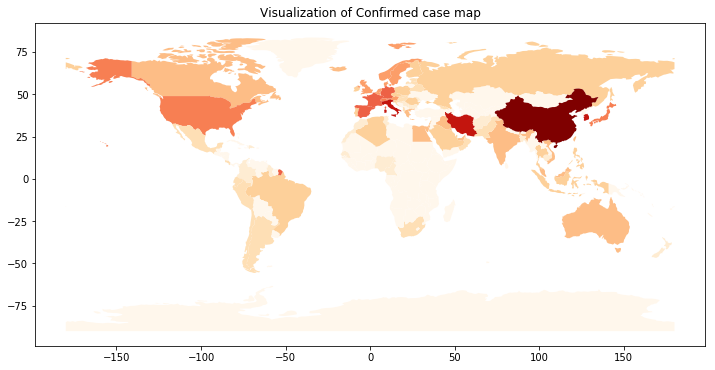

In [14]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='confirmed', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Confirmed case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Death case map')

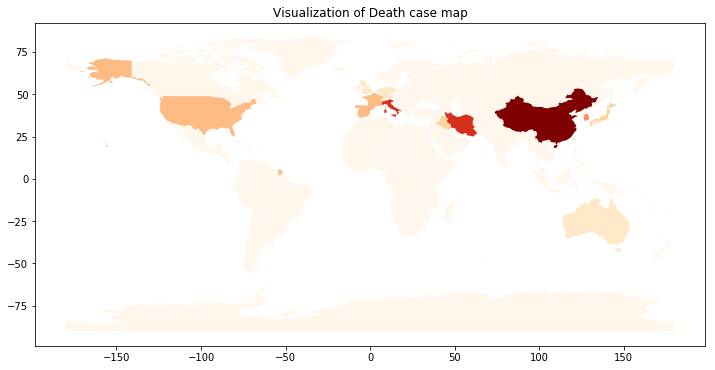

In [15]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Death case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Recovered case map')

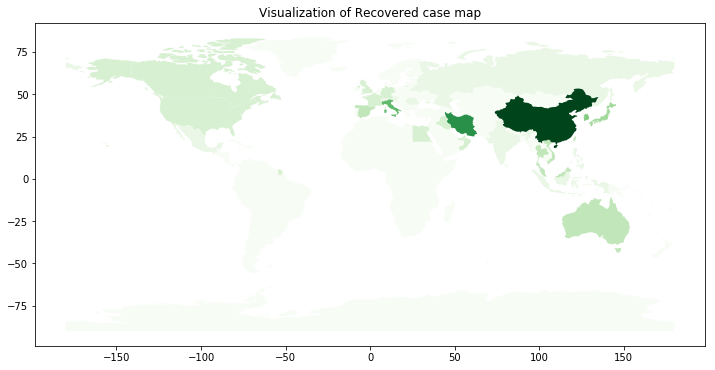

In [16]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered', cmap='Greens',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Recovered case map", fontsize=12)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'Visualization of death rate map')

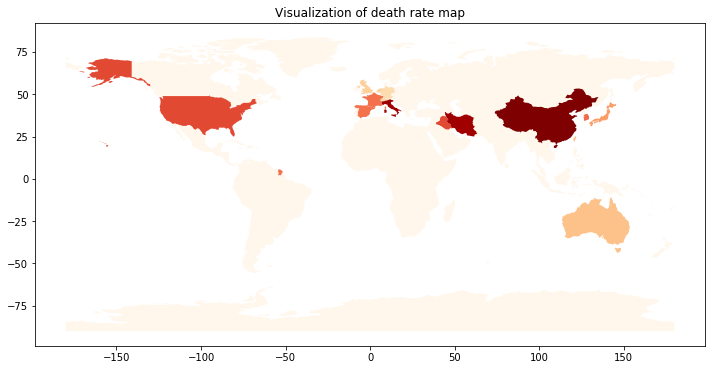

In [17]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death_rate', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of death rate map", fontsize=12)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'Visualization of recovered rate map')

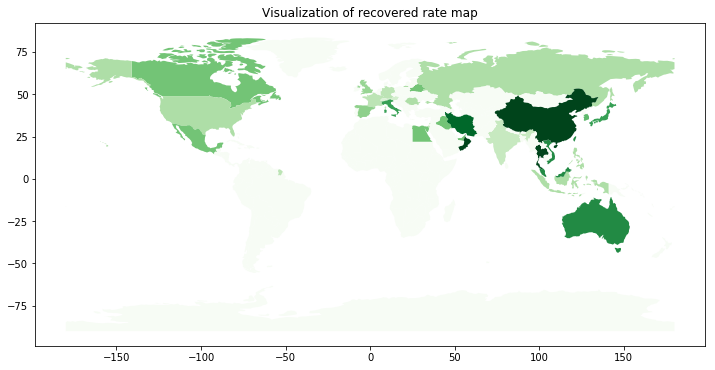

In [18]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered_rate', cmap='Greens',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of recovered rate map", fontsize=12)

Text(0.5, 1.0, 'Visualization of daily growth of confirmed case map')

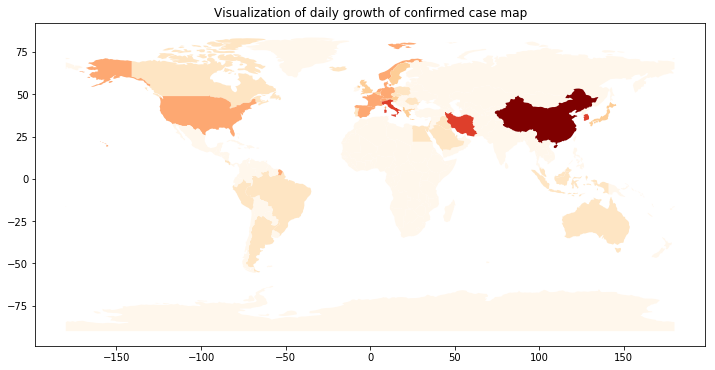

In [19]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='daily_growth', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of daily growth of confirmed case map", fontsize=12) 